In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

In [81]:
data = pd.read_csv('country_vaccinations.csv')
data

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31235,Zimbabwe,ZWE,2021-07-11,1491397.0,895980.0,595417.0,NaN,18598.0,10.03,6.03,4.01,1251.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...
31236,Zimbabwe,ZWE,2021-07-12,1531868.0,926312.0,605556.0,40471.0,23205.0,10.31,6.23,4.07,1561.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...
31237,Zimbabwe,ZWE,2021-07-13,1575539.0,955656.0,619883.0,43671.0,27567.0,10.60,6.43,4.17,1855.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...
31238,Zimbabwe,ZWE,2021-07-14,1613640.0,988746.0,624894.0,38101.0,30698.0,10.86,6.65,4.20,2065.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...


In [82]:
print(data.shape)
data.isnull().sum()

(31240, 15)


country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     13789
people_vaccinated                      14686
people_fully_vaccinated                17445
daily_vaccinations_raw                 16819
daily_vaccinations                       292
total_vaccinations_per_hundred         13789
people_vaccinated_per_hundred          14686
people_fully_vaccinated_per_hundred    17445
daily_vaccinations_per_million           292
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [83]:
data = data.drop(data[data.total_vaccinations.isna()].index)
data= data.drop(data[data.people_vaccinated.isna()].index)
print(data.shape)
data.isna().sum()

(16380, 15)


country                                   0
iso_code                                  0
date                                      0
total_vaccinations                        0
people_vaccinated                         0
people_fully_vaccinated                2684
daily_vaccinations_raw                 2829
daily_vaccinations                      197
total_vaccinations_per_hundred            0
people_vaccinated_per_hundred             0
people_fully_vaccinated_per_hundred    2684
daily_vaccinations_per_million          197
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

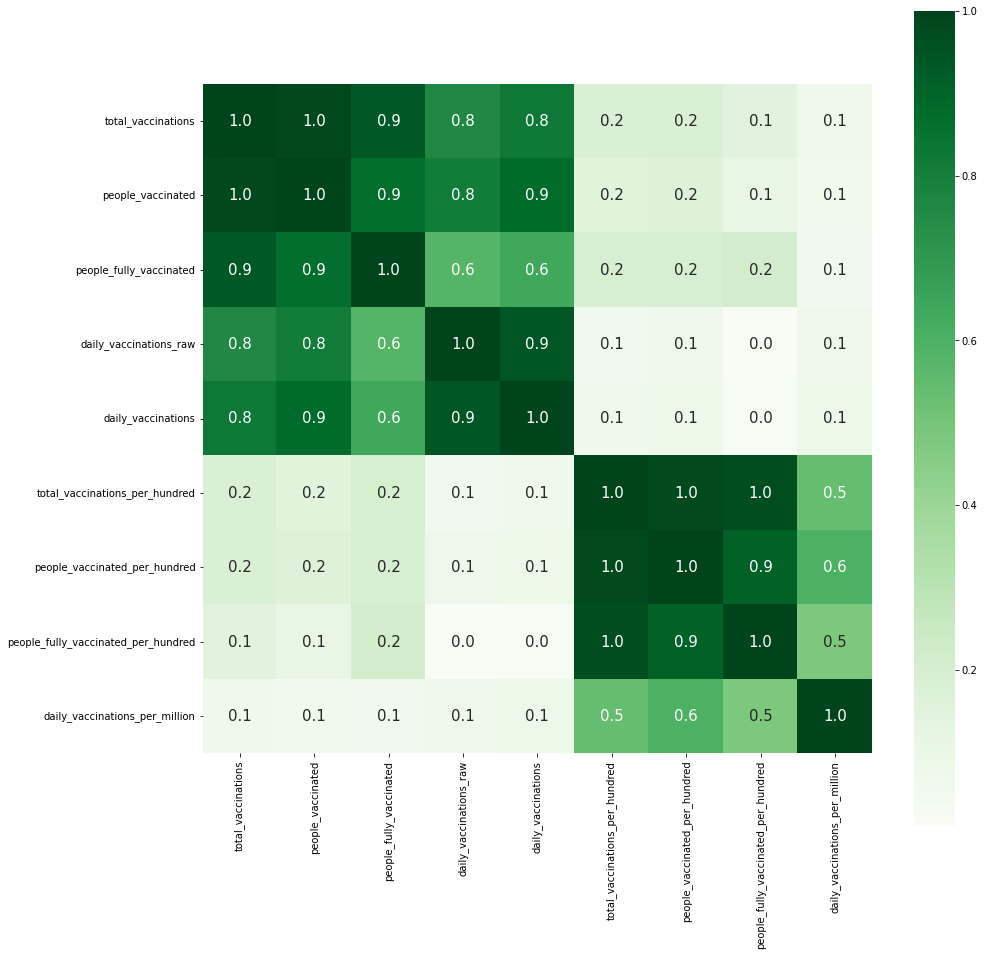

In [84]:
corr = data.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [85]:
difference = data.total_vaccinations.mean() - data.people_vaccinated.mean()
difference_per_hundred = data.total_vaccinations_per_hundred.mean() - data.people_vaccinated_per_hundred.mean()

data.people_vaccinated = data.people_vaccinated.fillna(data.total_vaccinations - difference)
data.people_vaccinated_per_hundred = data.people_vaccinated_per_hundred.fillna(data.total_vaccinations_per_hundred - difference_per_hundred)

In [86]:
data.isna().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                        0
people_vaccinated                         0
people_fully_vaccinated                2684
daily_vaccinations_raw                 2829
daily_vaccinations                      197
total_vaccinations_per_hundred            0
people_vaccinated_per_hundred             0
people_fully_vaccinated_per_hundred    2684
daily_vaccinations_per_million          197
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [87]:
# I fill other NaN values with zeros
data.daily_vaccinations = data.daily_vaccinations.fillna(0)
data.daily_vaccinations_per_million = data.daily_vaccinations_per_million.fillna(0)
data.people_fully_vaccinated = data.people_fully_vaccinated.fillna(0)
data.people_fully_vaccinated_per_hundred = data.people_fully_vaccinated_per_hundred.fillna(0)
data.daily_vaccinations_raw = data.daily_vaccinations_raw.fillna(0) 

In [88]:
data.isnull().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

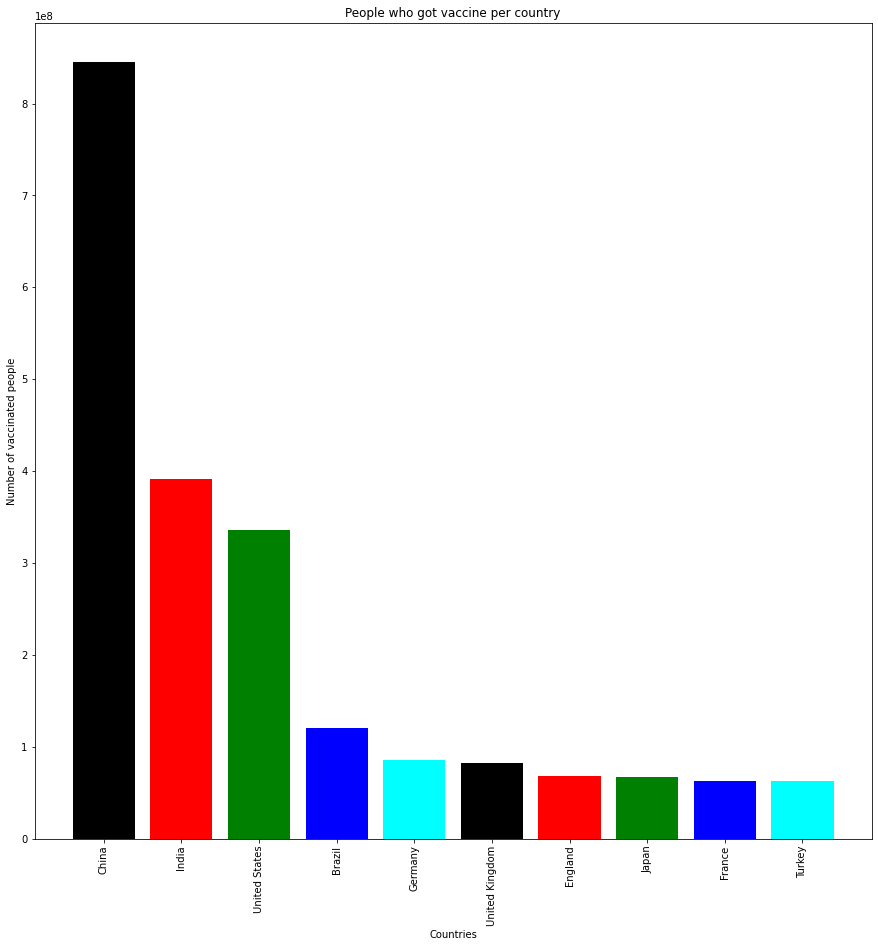

In [89]:
mine_data = data.copy()
columns = ['country', 'total_vaccinations', 'iso_code', 'vaccines']
vacc_amount = mine_data[columns].groupby('country').max().sort_values('total_vaccinations', ascending=False).dropna(subset=['total_vaccinations'])
vacc_amount = vacc_amount.iloc[:10]

plt.figure(figsize=(15, 15))
plt.bar(vacc_amount.index, vacc_amount.total_vaccinations, color=['black', 'red', 'green', 'blue', 'cyan','black', 'red', 'green', 'blue', 'cyan'])

plt.title('People who got vaccine per country')
plt.xticks(rotation = 90)
plt.ylabel('Number of vaccinated people')
plt.xlabel('Countries')
plt.show()

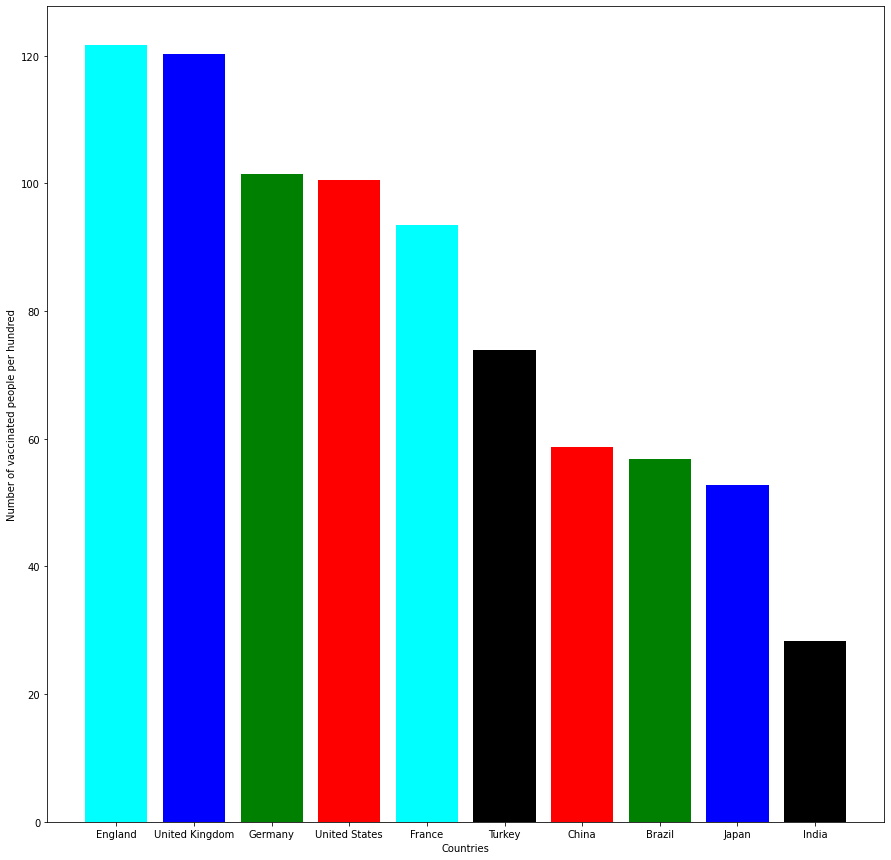

In [90]:
columns = ['country', 'total_vaccinations', 'iso_code', 'vaccines','total_vaccinations_per_hundred']

vacc_amount = mine_data[columns].groupby('country').max().sort_values('total_vaccinations', ascending=False).dropna(subset=['total_vaccinations'])
vacc_amount = vacc_amount.iloc[:10]

vacc_amount = vacc_amount.sort_values('total_vaccinations_per_hundred', ascending=False)

plt.figure(figsize=(15, 15))
plt.bar(vacc_amount.index, vacc_amount.total_vaccinations_per_hundred ,color=['cyan', 'blue', 'green', 'red', 'cyan','black', 'red', 'green', 'blue', 'black'])

plt.ylabel('Number of vaccinated people per hundred')
plt.xlabel('Countries')
plt.show()

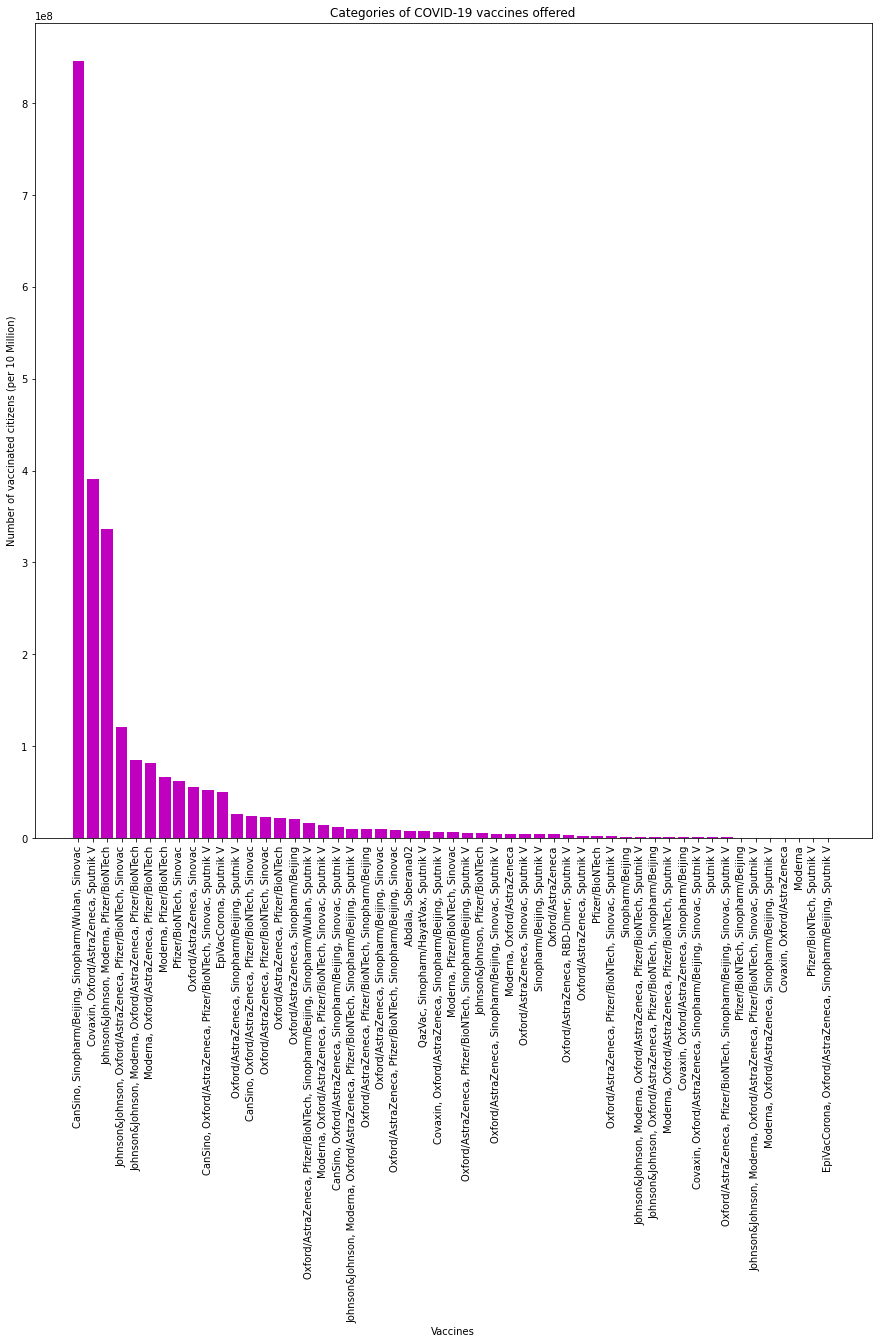

In [91]:
plt.figure(figsize=(15,15))
feature_lists = ['country', 'total_vaccinations', 'iso_code', 'vaccines']
vacc_no = mine_data[feature_lists].groupby('vaccines').max().sort_values('total_vaccinations', ascending=False).dropna(subset=['total_vaccinations'])

plt.bar(vacc_no.index, vacc_no.total_vaccinations, color ='m')
plt.title('Categories of COVID-19 vaccines offered')
plt.xticks(rotation = 90)
plt.ylabel('Number of vaccinated citizens (per 10 Million)')
plt.xlabel('Vaccines')
plt.show()

##Let's show total vaccinations based on every country grouped by types of vaccines. 

In [92]:
!pip install --upgrade plotly
!pip install pywaffle

In [93]:
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from pywaffle import Waffle
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px

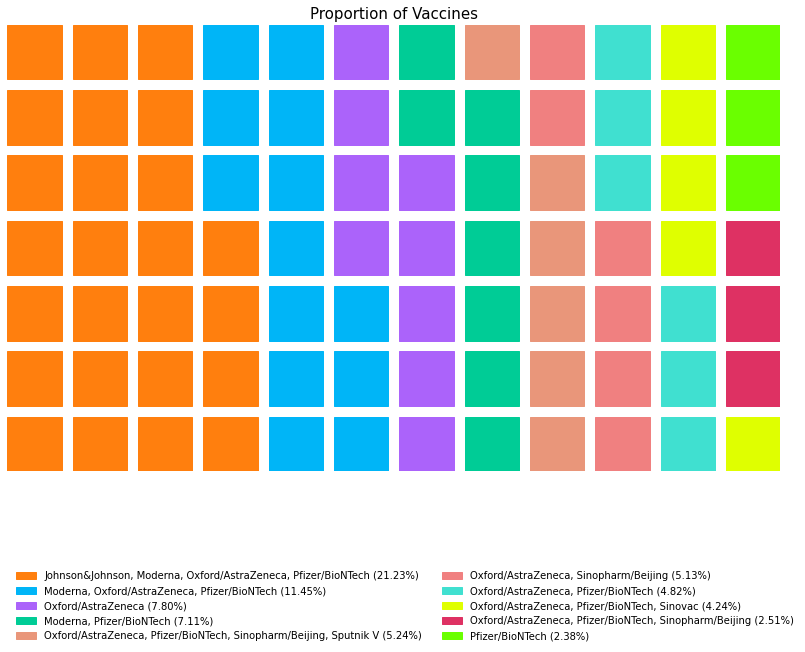

In [94]:
data = dict(mine_data['vaccines'].value_counts(normalize = True).nlargest(10)*100) 
                                 
vaccine = ['Oxford/AstraZeneca', 'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Pfizer/BioNTech',
       'Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Pfizer/BioNTech', 'Sputnik V', 'Oxford/AstraZeneca, Sinopharm/Beijing',
       'Sinopharm/Beijing', 'Moderna, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac'] 

fig = plt.figure( 
    rows=7,
    columns=12,
    FigureClass = Waffle, 
    values = data, 
    title={'label': 'Proportion of Vaccines', 'loc': 'center',
          'fontsize':15},
    colors=("#FF7F0E", "#00B5F7", "#AB63FA","#00CC96","#E9967A","#F08080","#40E0D0","#DFFF00","#DE3163","#6AFF00"),
    labels=[f"{k} ({v:.2f}%)" for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': 2, 'framealpha': 0},
    figsize=(12, 9)
)
fig.show()

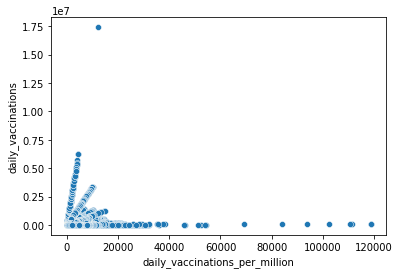

In [95]:
sns.scatterplot(x = mine_data["daily_vaccinations_per_million"], y = mine_data["daily_vaccinations"])
plt.show()

In [96]:
mine_data.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

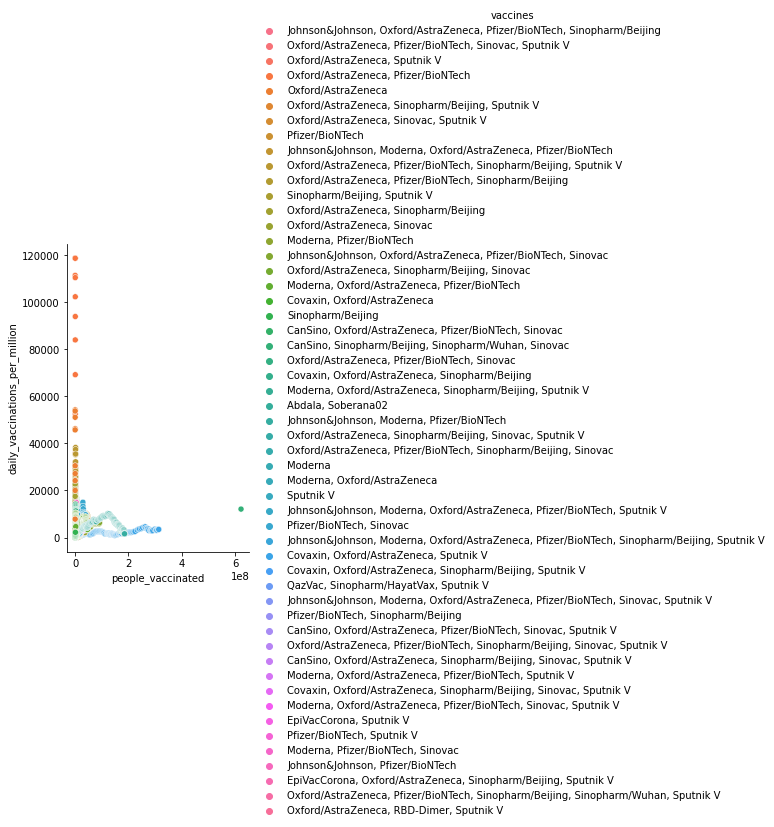

In [97]:
sns.relplot(x = 'people_vaccinated', y = 'daily_vaccinations_per_million', hue='vaccines', data = mine_data)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 



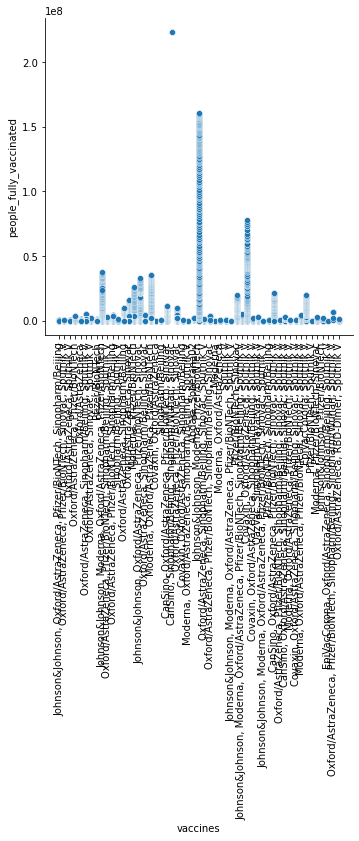

In [98]:
sns.relplot(x = 'vaccines', y = 'people_fully_vaccinated', data=mine_data)
plt.tick_params(axis= 'x', rotation = 90)

In [99]:
mine_data.iso_code
mine_data.dtypes
mine_data.drop(columns=['iso_code', 'date', 'source_name', 'source_website'], axis = 1, inplace = True)

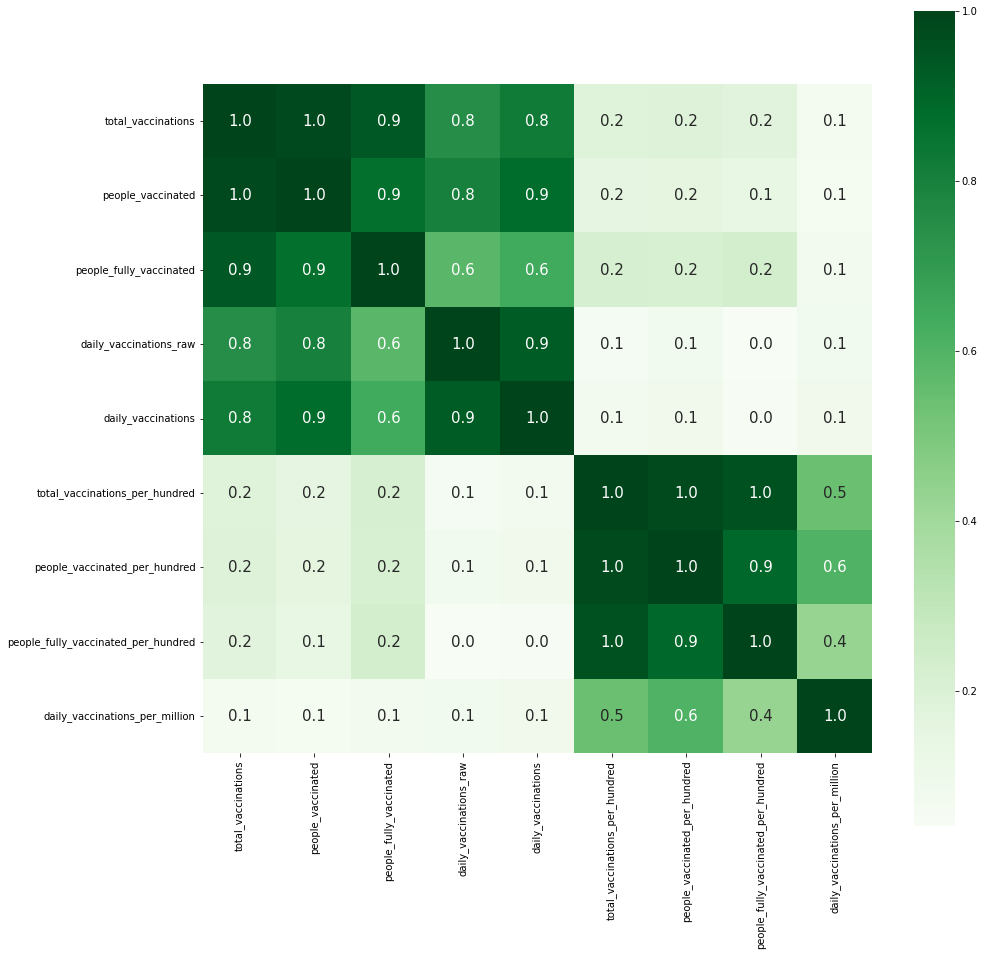

In [100]:
corr = mine_data.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [101]:
mine_data.dtypes

country                                 object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
dtype: object

In [102]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
mine_data['country'] = le.fit_transform(mine_data['country'])
mine_data['vaccines'] = le.fit_transform(mine_data['vaccines'])

In [103]:
X = mine_data[['country', 'people_vaccinated', 'people_fully_vaccinated', 'daily_vaccinations_raw', 'daily_vaccinations', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million', 'vaccines']].values
y = mine_data['total_vaccinations'].values

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [105]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [106]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [107]:
y_predict = regressor.predict(X_test)
y_predict.shape

(4095,)

In [108]:
from sklearn import metrics
metrics.r2_score(y_test, y_predict)

0.9938664283850835

In [109]:
! pip install xgboost

In [113]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
reg_mod = xgb.XGBRegressor(   
    n_estimators = 1000, 
    learning_rate = 0.08, 
    subsample = 0.75,
    colsample_bytree = 1,
    max_depth = 7, 
    gamma = 0
)

In [114]:
reg_mod.fit(X_train, y_train)
scores = cross_val_score(reg_mod, X_train, y_train, cv=10)
print(scores)

[10:32:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:32:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:33:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:33:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:33:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:33:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:34:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:34:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [115]:
reg_mod.fit(X_train, y_train)
predictions = reg_mod.predict(X_test)

[10:35:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [116]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(rmse)

2691023.709635771


In [117]:
from sklearn.metrics import r2_score
r2 = np.sqrt(r2_score(y_test, predictions))
print(r2)

0.9957373776108531
